ESTADISTICA PARA LA CIENCIA DE DATOS - PETER BRUCE, ANDREW BRUCE Y PETER GEDEK

# 2-Distribuciones de datos y muestreos

En general en los cientificos de datos no deben preocuparse por la naturaleza teórica de la población, deben centrarse en los procedimientos de muestreo y los datos disponibles. 

## 2.1-Muestreo aleatorio y sesgo de la muestra

Una muestra es un subconjunto de datos de un conjunto de datos más grande, población.
El muestreo aleatorio es un proceso en el cada miembro de la población que se muestrea tiene la misma probabilidad de ser elegido para la muestra en cada extracción. La muestra resultante se llama muestra aleatoria simple. El muestreo se puede hacer con reposición (las observaciones se vuelven a colocar en la población despues de cada extracción) o sin reposición (las observaciones una vez seleccionadas no estan disponibles para futuras extracciones).
La calidad de los datos (integridad, coherencia del formato, limpieza) es importante en ciencia de datos más que cantidad. En estadística diremos representativos con respecto a la población. Evitar el sesgo muestral, que la muestra no sea representativa de la población o no sea aleatorio. 
Sesgo del muestreo autoselección: por ejemplo las reseñas de un café, no es aleatorio, la gente es autoconvocada para escribir su reseña, puede ser un dato poco confiable, pero, se puede comparar con las reseñas de otro café.

### 2.1.1-Sesgo

El sesgo estadístico se refiere a errores de medición o muestreo que son sistemáticos y se producen por el proceso ya se a de medición o de muestreo.
Distinción entre los errores debidos al azar y los errores debido al sesgo. Ejemplo: arma que dispara a un objetivo, no golpeará al centro todo el tiempo. Un proceso no sesgado puede producir un error, aleatorio y no siempre en la misma dirección, Figura 2.2. Encambio, se ve en la Figura 2.3 un proceso sesgado, los disparos tienden a impactar en el cuadrante superior derecho. 

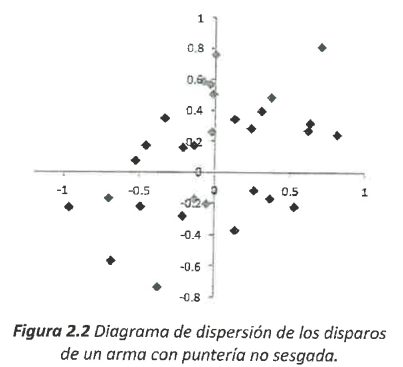

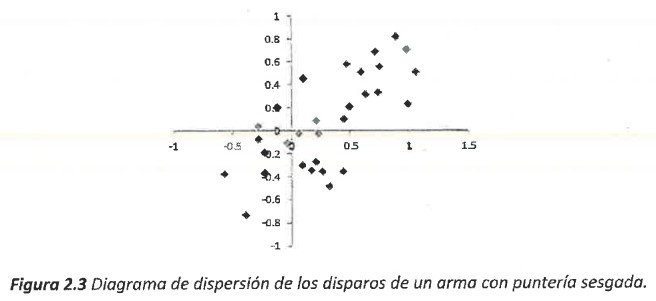

El sesgo puede ser observable o no, pero si se detecta es un indicador de que se especifico incorrectamente un modelo estadístico o de aprendizaje automático, o que se omitio una variable importante.

### 2.1.2-Selección aleatoria

Para el muestreo aleatorio hay que definir una población, esto suele ser laborioso, hay que tener en cuenta todos los detalles.
En el muestreo estratificado, la población se divide en estratos y se toman muestras aleatorias de cada estrato

### 2.1.3-Tamaño frente a calidad: ¿Cuánto importa el tamaño?

El tiempo dedicado al muestreo aleatorio, reduce el sesgo y permite mayor exploración y calidad de datos. (Los datos extremos y faltantes pueden brindar mucha información, pero resulta muy caro buscarlos en millones de datos o en miles).
Puede ser una muestra muy grande pero los datos son escasos, ejemplo las busquedas en Google generan mucha cantidad de datos, si se mide la mayor cantidad de ingresos pueden ser 0, una gran muestra que no brinda información.

### 2.1.4-Media muestral frente a media poblacional

Generalmente a partir de la media muestral se infiere a la poblacional. En estadística ambas se mantienen separadas.  
$\bar{x}$ es la media muestral, $\mu$ media poblacional.

## 2.2-Sesgo de selección

Se refiere a elegir datos de  forma selectiva, consiente o inconsientemente, que nos lleva a una conclusión engañosa o pasajera. 
Hay una diferencia en verificar un fenómeno poniendo a prueba una hipotesis mediante un experimento y descubrir un fenómeno al examinar los datos disponibles. (Ejemplo: lanzar una moneda 10 veces y que salga cara, hipotesis, experimento realizarlo, solo sería suerte. Realizar lo mismo en un estadio y seleccionar aquellos que lo lograron).
Efecto de busqueda masiva, ejecutamos diferentes modelos, realizamos varias consultas a un conjunto de datos, seguramente algo interesante encontraremos. Pero realmente es algo interesante o es algo fuera de lo normal. Para eso se usa un o varios conjuntos de reserva para validar el resultado. 
Conclusión: las formas típicas de sesgo de selección son: busqueda masiva, muestreo no aleatorio, selección de datos, selección de intervalos de tiempo, detención de experimento al encontrar "algo interesante". 

### 2.2.1-Regresión a la media

Regresión a la media: en multiples mediciones de una variable a lo largo del tiempo, los valores extremos tienden a acercarse a la media, promedio, con el tiempo. Ejemplo: Notas de alumnos, en un examen algunos tuvieron notas muy altas, otros bajas, en un segundo examen es probable que los que obtuvieron notas altas, las bajen y algunos de notas bajas obtengan mayor puntaje, por lo que siempre tienden a la media. 
Importante al tomar decisiones y evaluar desempeños, tener en cuenta varias mediciones.

## 2.3-Distribución muestral del estadístico

Distribución muestral, es la distribución de la frecuencia de un estadístico muestral (métrica calculada para una muestra extraída de una población).
Es probable que la distribución de un estadístico muestral sea más regular y adopte la forma de campana que la distribución de datos en sí. Cuanto mayor sea la muestra en la que se fundamenta el estadístico más cierta es esta información. Además, cuanto mayor sea la muestra, más estrecha será la distribución del estadístico muestral.

In [16]:
#Importar libreria 
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [17]:
# Importar el archivo de base de datos
LOANS_INCOME_CSV = "C:/Users/Admin/OneDrive/Big Data/Estadística/Práctica-Estadística/Data/loans_income.csv"

In [18]:
#Leer el archivo loans_income.csv
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns') #Como el archivo es un DataFrame unidimensional en un Serie de Pandas
loans_income.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [19]:
#Se crea el DataFrame sample_data
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000), #muestra aleatoria de 1000 del archivo loans_income
    'type': 'Data', # se crea columna type, con valor Data para indicar que son muestras de datos originales
})

#Se crea el DataFrame sample_mean_05
sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)], 
#Se crea la columna income con la media de 5 muestras aleatorias con reposición por 1000 veces
    'type': 'Mean of 5',
# se crea columna type, con valor 'Mean of 5' para indicar que son muestras de tamaño 5
})

# Se crea un DataFrame pero para una muestra de tamaño 20
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

#Se concatenan los tres en un DataFrame llamado results
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())


         income  type
25485  131000.0  Data
40213  125000.0  Data
14269   80000.0  Data
15249   43000.0  Data
17461   74000.0  Data


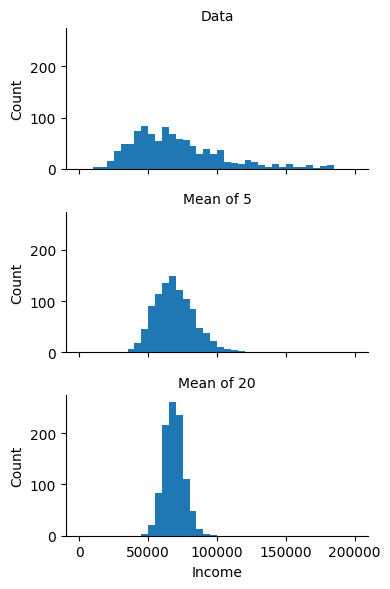

In [20]:
#Se crea un conjunto de gráficos facetados que muestran el histograma de la variable income
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

### 2.3.1-Teorema del límite central

Lo referido del punto anterior describe el teorema del límite central, asegura que, las medias extraídas de varias muestras se asemejan a la curva de campana, siempre y cuando el tamaño de la muestra sea lo bastante grande y la desviación no sea demasiado grande.  
El teorema del límite central, permite utilizar fórmulas de aproximación normal, como la distribución t, para calcular distribuciones muestrales, para realizar inferencias, es decir, intervalos de confianza y pruebas de hipótesis. 
En la ciencia de datos no se utiliza mucho.

### 2.3.2-Error estándar

 El error estándar, es una métrica que mide la variabilidad de una métrica de la muestra. Se utiliza la desviación estándar (mide la variabilidad de puntos de datos individuales), s, de los valores de la muestra y el tamaño , n.
 A medida que aumenta el tamaño de la muestra, el error estándar disminuye. La relación entre el error estándar y el tamaño de la muestra, se denomina la regla de la raíz cuadrada de n.

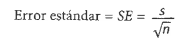

## 2.4-Bootstrap

Extraer muestras adicionales con reposición y volver a cálcular el estadístico o modelo para cada muestra. 
Se pued utilizar el método resample de scikit-learn. 
Instalar en la términal: pip install scikit-learn.
NOTA: verificar si la versión de Python es la misma.

In [21]:
from scipy import stats
from sklearn.utils import resample

In [22]:
results = [] 
#Se crea una lista vacía llamada results que se utilizará para almacenar las medianas de las muestras bootstrap.
for nrepeat in range(1000):
#Bucle que se repite 1000 veces    
    sample = resample(loans_income)
#En cada iteración, se utiliza la función resample para realizar un remuestreo bootstrap de la Serie loans_income. 
#La muestra remuestreada se almacena en la variable sample.
    results.append(sample.median())
#Se calcula la mediana de la variable sample y se almacena en results.
results = pd.Series(results)
#Se convierte la lista de resultados en una Serie de pandas llamada results. 
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
#bias es el sesgo de la diferencia entre la media dee las medianas remuestradas y la mediana original   
print(f'std. error: {results.std()}')
#error estándar

Bootstrap Statistics:
original: 62000.0
bias: -81.29450000000361
std. error: 227.6232520297841


Hay un sesgo negativo de -$73 y un error estándar de $211, lo que sugiere cierta variabilidad  en la estimación de mediana a través de los muestreos.

### 2.4.1-Remuestreo frente a bootstrapping

## 2.5-Intervalos de confianza

Es otra forma de comprender el error potencial en la estimación de una muestra. 
El porcentaje asociado con el intervalo de confianza, se llama nivel de confianza. Cuanto mayor es el nivel, más amplio es el intervalo, mayor incertidumbre. Bootstrap es una forma de crear intervalos de confianza.

In [23]:
import numpy as np
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

68760.51844
55734.1


Text(56722.94499999999, 60, '90% interval')

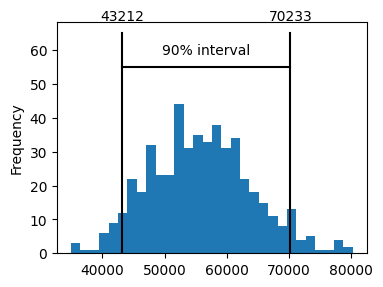

In [24]:
confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Counts')

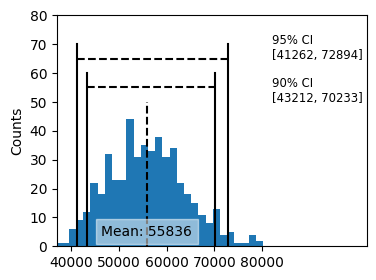

In [25]:
meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()


## 2.6-Distribución normal

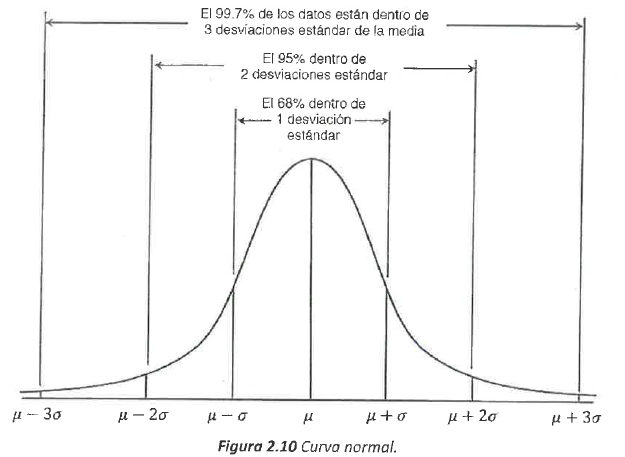

### 2.6.1-Normal estándar y diagramas QQ

Una distribución normal estándar es aquella en la que las unidades del eje x se expresán en términos de desviaciones estándar de la media. A esto también se lo denomina normalización o estandarización. El valor transformado se denomina puntuación z.
El diagrama QQ se determina visualmente lo cerca que esta una muestra de una distribución especificada, en este caso, la distribución normal. 

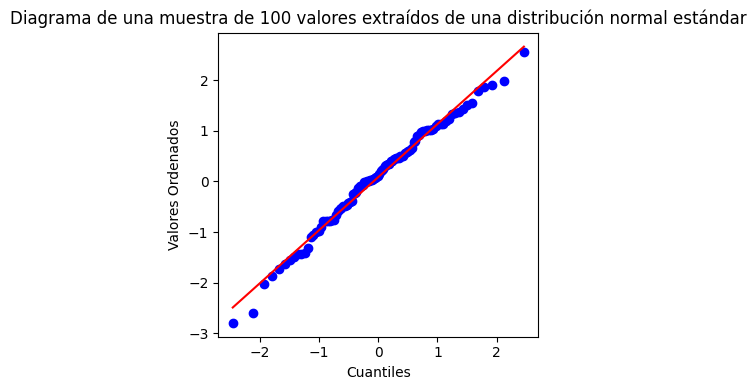

In [26]:
fig, ax = plt.subplots(figsize=(4, 4))
#creación de la figura y los ejes

norm_sample = stats.norm.rvs(size=100)
# genera una muestra de 100 valores aleatorios de una distribución normal estándar 
#(media 0, desviación estándar 1) utilizando la función rvs de la biblioteca SciPy.
stats.probplot(norm_sample, plot=ax)
#stats.probplot crea un gráfico de probabilidad para la muestra norm_sample.
#El argumento plot=ax indica que se debe usar el conjunto de ejes ax previamente creado para dibujar el gráfico.

ax.set_ylabel("Valores Ordenados")
ax.set_xlabel("Cuantiles")
ax.set_title("Diagrama de una muestra de 100 valores extraídos de una distribución normal estándar")

plt.tight_layout()
plt.show()


## 2.7-Distribuciones de cola larga

La mayoria de las distribuciones tienen cola, que se deben a los datos extremos.

In [27]:
SP500_DATA_CSV = "C:/Users/Admin/OneDrive/Big Data/Estadística/Práctica-Estadística/Data/sp500_sectors.csv"

In [28]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

In [29]:
print(sp500_px.columns)

Index(['sector', 'sector_label', 'sub_sector', 'symbol'], dtype='object')


## 2.8-Distribución t de Student

Se asemeja a la distribución normal, pero con colas más gruesas.
Se utiliza como referencia para la distribución de medias muestrales, diferencia entre dos medias muestrales, parámetros de regresión, etc. 

## 2.9-Distribución binomial

Es la distribución de frecuencias del número de éxitos x, en un número dado de ensayos n, con una probabilidad específica p de éxito en cada ensayo. Esto se da solo en muestras binarias. Respondería preguntas como: Si la probabilidad de que un clic se convierta en una venta es de 0.02, ¿cuál es la probabilidad de observar 0 ventas en 200 días?

In [30]:
print(stats.binom.pmf(2, n=5, p=0.1))

print(stats.binom.cdf(2, n=5, p=0.1))


0.07289999999999992
0.99144


## 2.10-Distribución chi cuadrado

Hipótesis nula o modelo nulo, es la no correlación entre variables, es decir la independencia entre variables, esto se mide con chi cuadrado.
Chi cuadrado mide la desviación que cabria esperar  en un modelo nulo. 

## 2.11-Distribución F

La prueba F implica comparar dos varianzas (o sumas de cuadrados) bajo la hipótesis nula de que son iguales. La razón de las varianzas sigue una distribución F bajo esta hipótesis nula.
Distribución continúa que surge del análisis de la varianza (ANOVA) y en la comparación de varianzas en modelos de regresión lineal. 
ANOVA compara la media de tres o mas grupos para determinar si hay diferencias entre ellos. 
La prueba F en ANOVA evalúa si la varianza de los grupos son iguales, y si no son iguales, sugiere que al menos un grupo tiene una varianza diferente.
La prueba F en distribución lineal, evalúa si la inclusión de un conjunto adicional de predictore mejora significativamente el ajuste del modelo.


## 2.12-La distribución de Poisson y distribuciones relacionadas

### 2.12.1-Distribución de Poisson

Es una distribución de probabilidad discreta que describe el número de eventos que ocurrirán en un intervalo de tiempo fijo. Ejemplo: el número de accidentes en una intersección durante un día.

In [32]:
import scipy.stats

In [34]:
poisson_sample = scipy.stats.poisson.rvs(2, size=100)

In [35]:
print(poisson_sample)

[2 0 4 1 0 4 1 0 3 6 2 2 1 2 3 1 1 1 2 1 3 1 4 3 2 1 3 1 2 0 1 3 2 3 2 0 8
 1 1 1 1 4 0 2 3 0 2 1 2 2 3 2 2 5 3 2 4 0 3 2 0 2 2 3 2 1 3 1 1 2 1 1 2 2
 3 3 2 0 1 3 5 1 0 2 4 4 3 1 2 1 5 0 1 3 4 4 3 2 3 6]


Esto genera 100 números aleatorios a partir  de la distribución de Poisson con λ=2. λ es el parámetro de la tasa (o tasa promedio) de ocurrencia de eventos.

### 2.12.2-Distribución exponencial

La distribución exponencial es una distribución de probabilidad continua que modela el tiempo que debe pasar antes de que ocurra un evento. Es particularmente útil para modelar procesos en los cuales los eventos suceden de manera continua e independiente a una tasa constante. La distribución exponencial es la base para la distribución de Poisson, que modela el número de eventos que ocurren en un intervalo de tiempo fijo. Es útil para modelar tiempos de espera entre eventos. λ debe permanecer constante durante un periodo, esto no es razonable generalmente, por lo cual, se deben dividir en segmentos los periodos de tiempo para que sean lo suficientemente homogéneos para el análisis. Ejemplo: el tráfico en una autopista. 

In [36]:
stats.expon.rvs(scale=5, size=100)

array([3.62951709e+00, 6.76981030e+00, 1.23573368e+00, 1.00263297e+00,
       1.66211083e+00, 3.68926878e+00, 3.54265111e-01, 4.18235903e+00,
       8.62821783e-01, 3.55202883e+00, 2.35925366e+00, 6.11062088e+00,
       1.71231125e+00, 1.08527683e+00, 2.31623086e+00, 9.64553779e-01,
       3.19802076e+01, 1.89341952e+00, 1.20760401e+01, 9.67935465e+00,
       1.43448600e+00, 1.86616808e+00, 6.83927180e+00, 3.99651221e+00,
       4.57281119e-01, 1.29455180e+01, 1.01246763e-01, 1.30377124e+00,
       3.84676398e+00, 9.64786868e+00, 7.01725616e-01, 1.47627586e+00,
       1.21206312e+00, 5.48446599e-01, 2.31865694e+00, 3.98370044e+00,
       1.01602383e+01, 2.79742387e+00, 1.08119358e+01, 3.07725525e+00,
       1.42627149e+00, 1.22618825e+00, 2.46194816e+00, 6.94193616e+00,
       3.75182520e+00, 1.45963309e-01, 6.74913278e-01, 2.58242852e-01,
       4.04951621e+00, 1.10949907e+01, 9.27554569e-01, 2.32924846e+00,
       4.28276521e+00, 7.12913752e+00, 2.44621806e+00, 1.19530431e+00,
      

Este código genera 100 números aleatorios a partir de una distribución exponencial donde  el número medio de eventos por periodo de tiempo es de 0.2. Se podría usar para simular 100 intervalos, en minutos, entre las llamadas de servicío, donde la tasa promedio de llamadas entrantes es 0.2 por minuto.

### 2.12.3-Estimación de la tasa de fallos

En muchas estimaciones, lamnda es la tasa de fallos. Muchas veces no tenemos esa información, o es pobre, por ejemplo la falla del motor de una aeronave. Se puede aplicar la prueba de bondad de ajuste a varias tasas para determinar lo bien que se ajustan a los datos observados. 

### 2.12.4-Distribución de Weibull

 es una distribución de probabilidad continua que se utiliza para modelar la duración de eventos o el tiempo hasta que ocurre un evento. Su flexibilidad la hace adecuada para describir una amplia variedad de fenómenos, y se utiliza comúnmente en el análisis de confiabilidad y en estudios de tiempo hasta el fallo. λ es el parámetro de escala que afecta la "anchura" de la distribución. k es el parámetro de forma que determina la forma de la distribución (exponencial si k = 1, logarítmicca si k < 1 , y más general si k > 1).

In [37]:
stats.weibull_min.rvs(1.5, scale=5000, size=100)

array([  363.01557529,  5441.97461693,  8086.37260485,  2073.36396707,
        3318.73640575,  1745.39038341,   972.84288239,  3006.40059732,
        2642.46317416,  5839.68932887,  2794.51111561,  2403.18444266,
        3276.60194914,  6030.75172102,  9154.6258359 ,  5123.41631814,
        1183.42846449,   380.3432074 ,  7058.19736537,  3799.43458647,
        3152.92182363,  6863.0081699 ,  3956.69558085,  2910.40056697,
         776.49485339,  4928.70056159, 14558.86729844,  4705.86583385,
        1595.24378737,  1400.30326499,  4236.90068968,  4056.89607656,
        3219.57336745,  3439.92702514,  7290.52588444,  6679.51004613,
        1016.17080509,  2833.17750797,  2560.89704118,  5182.83476663,
        6183.61121022,  6646.01608258,  5739.07793612,  4339.44573492,
        1517.58661937,  5305.94449615,  5594.85475999,  5376.4552446 ,
        6604.24628035,  5332.93622455,  2023.22354409,  2432.41395969,
        2628.77941268,  1305.0296173 ,   655.0509398 ,  2531.05386588,
      

Este código genera 100 valores a partir de k > 1, por lo que el parámetro de la forma será más pesada a la derecha. El parámetro de escala es 5000, esto afecta la anchura de la distribución.